In [187]:
using Pkg
using Roots  
using Plots
using ForwardDiff
using DataFrames

## ZAD A 
Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

### 1. 
Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

In [188]:
bisection(f) = find_zero(f, (0, 1), Bisection(), tracks = tracker) 
D(f) = x->ForwardDiff.derivative(f, float(x))
newtonMethod(f) = find_zero((f, D(f)),0, Roots.Newton(),tracks = tracker)
steffenson(f) = find_zero(f, 0, Order2(),tracks = tracker)

tracker = Roots.Tracks();

In [189]:
f1(x) = sin(x) - x/2
f2(x) = cos(x) - x
f3(x) = (x+3)*(x-1)^2
f4(x) =  20.0*x/(100.0*x*x + 1.0)
f5(x) =  (20.0*(x-1)/(100.0*(x-1)*(x-1)+1.0))
f6(x) = 2*x-exp(-x)


df = DataFrame(Function=Function[],Method=Function[],Iterations=Float64[],Calls=Float64[], Result = String[])
for func in [f1, f2, f3, f4, f5, f6]
    flag = "OK"
    res1 = bisection(func)
    if func(res1) != 0
        println("Error ocured in",func," ", bisection," with value: ", func(res1))
        flag = "ERROR"
    end
    push!(df,(func,bisection,tracker.steps,tracker.fncalls, flag))

    flag = "OK"
    res2 = newtonMethod(func)
    if func(res2) != 0
        println("Error ocured in",func," ", newtonMethod," with value: ", func(res2))
        flag = "ERROR"
    end
    push!(df,(func,newtonMethod,tracker.steps, tracker.fncalls, flag))

    flag = "OK"
    res3 = steffenson(func)
    if func(res3) != 0
        println("Error ocured in",func," ", steffenson," with value: ", func(res3))
        flag = "ERROR"
    end
    push!(df,(func,steffenson,tracker.steps, tracker.fncalls, flag))
end
println()
println(df)

Error ocured inf3 newtonMethod with value: 4.564959859473074e-16
Error ocured inf3 steffenson with value: 5.483192153677992e-16
Error ocured inf5 newtonMethod with value: -1.176323879061277e-8
Error ocured inf5 steffenson with value: -8.570793117762626e-9
Error ocured inf6 newtonMethod with value: -1.1102230246251565e-16

18×5 DataFrame
 Row │ Function  Method        Iterations  Calls    Result 
     │ Function  Function      Float64     Float64  String 
─────┼─────────────────────────────────────────────────────
   1 │ f1        bisection            0.0      3.0  OK
   2 │ f1        newtonMethod         1.0      5.0  OK
   3 │ f1        steffenson           1.0      7.0  OK
   4 │ f2        bisection           61.0     70.0  OK
   5 │ f2        newtonMethod        66.0     80.0  OK
   6 │ f2        steffenson          72.0     90.0  OK
   7 │ f3        bisection           72.0     93.0  OK
   8 │ f3        newtonMethod        98.0    145.0  ERROR
   9 │ f3        steffenson         12

### 2. 
Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

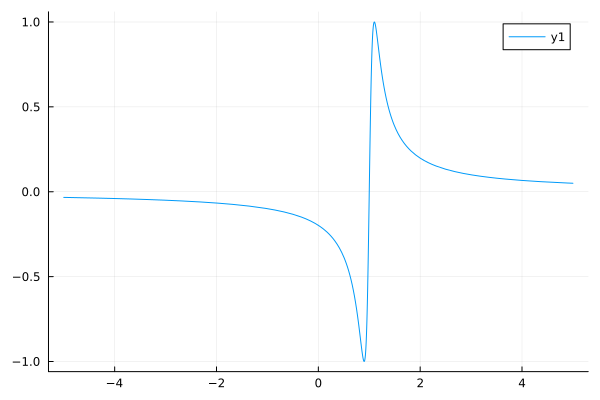

In [190]:
plot(f5)

In [191]:
df = DataFrame(Function=Function[],Method=Function[],Iterations=Float64[],Calls=Float64[], Result = String[])
func = f5

flag = "OK"
res1 = bisection(func)
if func(res1) != 0
    println("Error ocured in",func," ", bisection," with value: ", func(res1))
    flag = "ERROR"
end
push!(df,(func,bisection,tracker.steps,tracker.fncalls, flag))

flag = "OK"
res2 = newtonMethod(func)
if func(res2) != 0
    println("Error ocured in",func," ", newtonMethod," with value: ", func(res2))
    flag = "ERROR"
end
push!(df,(func,newtonMethod,tracker.steps, tracker.fncalls, flag))

flag = "OK"
res3 = steffenson(func)
if func(res3) != 0
    println("Error ocured in",func," ", steffenson," with value: ", func(res3))
    flag = "ERROR"
end
push!(df,(func,steffenson,tracker.steps, tracker.fncalls, flag))

println(df)

Error ocured inf5 newtonMethod with value: -1.176323879061277e-8
Error ocured inf5 steffenson with value: -8.570793117762626e-9
3×5 DataFrame
 Row │ Function  Method        Iterations  Calls    Result 
     │ Function  Function      Float64     Float64  String 
─────┼─────────────────────────────────────────────────────
   1 │ f5        bisection          247.0    385.0  OK
   2 │ f5        newtonMethod       271.0    433.0  ERROR
   3 │ f5        steffenson         297.0    481.0  ERROR


Newton Baffler

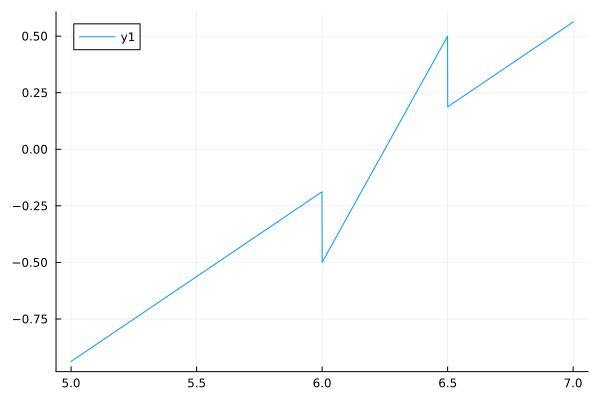

In [192]:
bisection(f) = find_zero(f, (5, 7), Bisection(), tracks = tracker) 

function NewtonBaffler(x)
    if x < 6.0
        fx = 0.75 * ( x - 6.25 )
    elseif x <= 6.50 
        fx = 2.00 * ( x - 6.25 )
    else
        fx = 0.75 * ( x - 6.25 ) 
    end
    return fx
end

xs = range(5.0, stop=7.0, step=0.00001)
plot(NewtonBaffler, extrema(xs)...)

In [193]:
df = DataFrame(Function=Function[],Method=Function[],Iterations=Float64[],Calls=Float64[], Result = String[])
func = NewtonBaffler

flag = "OK"
res1 = bisection(func)
if func(res1) != 0
    println("Error ocured in",func," ", bisection," with value: ", func(res1))
    flag = "ERROR"
end
push!(df,(func,bisection,tracker.steps,tracker.fncalls, flag))

flag = "OK"
res2 = newtonMethod(func)
if func(res2) != 0
    println("Error ocured in",func," ", newtonMethod," with value: ", func(res2))
    flag = "ERROR"
end
push!(df,(func,newtonMethod,tracker.steps, tracker.fncalls, flag))

flag = "OK"
res3 = steffenson(func)
if func(res3) != 0
    println("Error ocured in",func," ", steffenson," with value: ", func(res3))
    flag = "ERROR"
end
push!(df,(func,steffenson,tracker.steps, tracker.fncalls, flag))

println(df)

3×5 DataFrame
 Row │ Function       Method        Iterations  Calls    Result 
     │ Function       Function      Float64     Float64  String 
─────┼──────────────────────────────────────────────────────────
   1 │ NewtonBaffler  bisection          299.0    486.0  OK
   2 │ NewtonBaffler  newtonMethod       300.0    488.0  OK
   3 │ NewtonBaffler  steffenson         302.0    493.0  OK



### 3. 
Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

Bisection Method
 - funkcja nie jest ciągła na podanym przedziale

func x/(x-2) - 1 | x:1.9999999999999998 f(x):-9.007199254740992e15


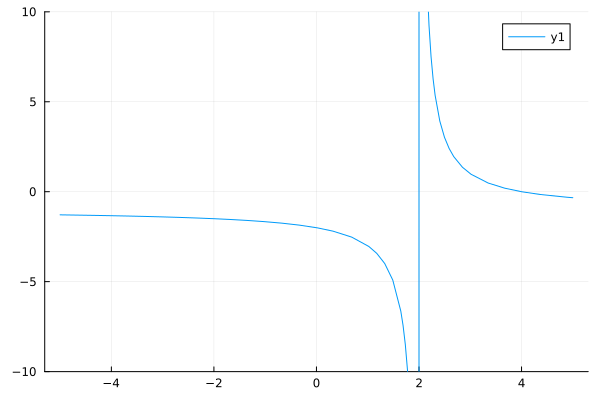

In [194]:
f(x) = x/(x-2) - 2
res = find_zero(f,(1,2),Bisection())
println("func x/(x-2) - 1 | x:", res, " f(x):", f(res))
plot(f, ylim = (-10,10))


Steffenson Method

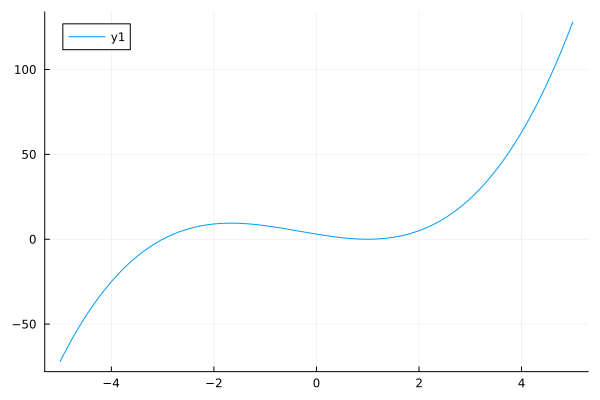

In [195]:
plot(f3)

In [196]:
res = steffenson(f3)
println("func (x+3)*(x-1)^2 | x:", res, " f(x):", f3(res))
res = newtonMethod(f3)
println("func (x+3)*(x-1)^2 | x:", res, " f(x):", f3(res))


func (x+3)*(x-1)^2 | x:0.9999999882918915 f(x):5.483192153677992e-16
func (x+3)*(x-1)^2 | x:0.9999999893171166 f(x):4.564959859473074e-16


In [197]:
res = bisection(f3)
println("func (x+3)*(x-1)^2 | x:", res, " f(x):", f3(res))

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



Newton Method
- niedokładność floata

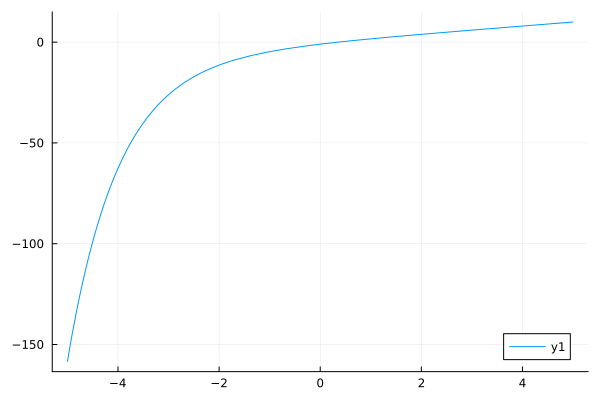

In [198]:
plot(f6)

In [199]:
res = newtonMethod(f6)
println("func 2*x-exp(-x) | x:", res, " f(x):", f6(res))

func 2*x-exp(-x) | x:0.3517337112491958 f(x):-1.1102230246251565e-16


## ZAD B
Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)